<a href="https://colab.research.google.com/github/jonathanrsbr/data_science_estudos/blob/main/meu_data_science_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação do pandas e da base de dados

In [217]:
import pandas as pd 

url= "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

#caminho
dados= pd.read_csv(url)

#sempre é bom "dar um head", para saber se o import foi bem sucedido 

dados.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Pré-Visualização

In [218]:
#Para ver melhor a base de dados

dados

#Pega aleatoriamente uma linha, para análise, para dizer o número de linha quero analizar, basta colocar um número dentro da função
#É importante para ter uma noção melhor do que está presente na base de dados
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4286,Rua José Bento,Cambuci,São Paulo,160,3,3,1,R$ 930.000
4987,NaN,Vila Mariana,São Paulo,180,3,2,2,R$ 870.000
7773,"Rua Jacinto Ribeiro, 54",Jardim das Vertentes,São Paulo,264,4,3,2,R$ 640.000
3531,NaN,Campo Belo,São Paulo,137,3,3,2,R$ 600.000
2338,NaN,Jardim Leonor,São Paulo,491,4,8,4,R$ 3.100.000
9083,NaN,Jardim Marajoara,São Paulo,400,4,3,3,R$ 1.700.000
1836,Rua Rodrigues Guião,Pinheiros,São Paulo,120,3,2,1,R$ 1.650.000
1437,NaN,Jardim Guedala,São Paulo,700,4,5,3,R$ 3.960.000
5386,Rua João Jabotam,Vila Anglo Brasileira,São Paulo,272,3,2,2,R$ 6.200\n /Mês
7343,Avenida Manoel dos Reis Araújo,Jardim Marajoara,São Paulo,500,3,6,6,R$ 2.300.000


Analisar uma coluna específica (Ex: Bairro)

In [219]:
dados ["Bairro"]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

Analisar uma coluna e uma linha específica (ColunaxLinha), chamamos "Slice"

In [220]:
dados ["Bairro"] [6522]

'Vila Paulo Silas'

Analisar os tipos presentes em cada parte da tabela, usamos o .info

In [221]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Para fazer a média e mediana de uma coluna contendo ints (caso não seja, precisamos tratar antes)

In [222]:
a= dados.Metragem.mean()

b= dados.Metragem.median()

print(f"{a:.2f}")

print(b)

442.30
290.0


In [223]:
dados["Metragem"].mean()

442.30065947242207

Tem imóveis no bairro "Vila Mariana"?

In [224]:
#Na coluna dados, tem algo que seja (==) "Vila MAriana"?
dados["Bairro"] == "Vila Mariana"

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

Como em cima vimos valores boleanos False (0), ao multiplicarmos por 1, o resultado seria 1 * 0 = 0

In [225]:
#Certificando de que os boleanos são números

(dados["Bairro"] == "Vila Mariana") * 1

0        0
1        0
2        0
3        0
4        0
        ..
10003    0
10004    0
10005    0
10006    0
10007    0
Name: Bairro, Length: 10008, dtype: int64

Contagem de imóveis em "Vila Mariana"

In [226]:
#Com a visualização dos boleanos como números, podemos somar todos
#Caso o valor seja diferente de 0, temos que há algum valor True (1)
#Ou seja, confirma a existência de casas no bairro "Vila Mariana"

sum(dados["Bairro"] =="Vila Mariana")

184

Criando e visualizando uma variável com apenas imóveis da "Vila Mariana"

In [227]:
tem_imoveis_vila = (dados ["Bairro"] == "Vila Mariana")

tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

Usando o filtro do pandas, assim criando um Data Frame apenas com imóveis no bairro "Vila Mariana"

In [228]:
#dados para chamar a variável da tabela inteira criada no início
#os colchetes fazem um filtro dentro da tabela principal
#como usamos a variável que continha apenas os imóveis de "Vila Mariana", o filtro criou o novo Data Frame

#>>dados[tem_imoveis_vila]<<

#podemos criar uma variável com esse filtro

imoveis_vila_mariana = dados[tem_imoveis_vila]

imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


A média de Metragem somente no bairro "Vila Mariana"

In [229]:
media_vila = imoveis_vila_mariana["Metragem"].mean()

print(f"{media_vila:.2f}")

233.62


O bairro tem mais imóveis a venda?

In [230]:
#Sabemos que o Alto de Pinheiro tem mais bairros a venda
#Sabemos que existem 701 bairros no nosso banco de dados

dados["Bairro"].value_counts()


Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

Gráficos!

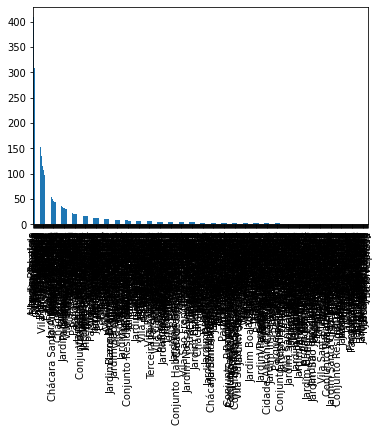

In [231]:
#visualização prévia
n_imoveis_bairro= dados["Bairro"].value_counts()

n_imoveis_bairro.plot.bar()

#como são 701, o gráfico não fica bom

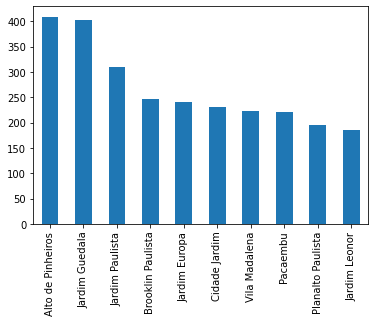

In [232]:
#Assim como no início, para uma visualização geral do nosso trabalho, usamos o .head com um limite de elementos
#Assim temos certeza de que veremos o 10 com mais vendas

n_imoveis_bairro.head(10).plot.bar()

#MÉDIA DE MÉTRICA PARA CADA *BAIRRO*

In [233]:
#Primeiro criamos uma tabela contendo apenas "Bairro" e "Metragem"
#Em seguida, agrupamos todos os repetidos da linha "Bairro"
#Pra transformar os bairros repetidos em um só, a metregem foi unida com a função média! Poderia ser soma ou qualquer outra.

media_por_loja = dados[["Bairro", "Metragem"]].groupby("Bairro").mean()

media_por_loja



,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


# GRÁFICO

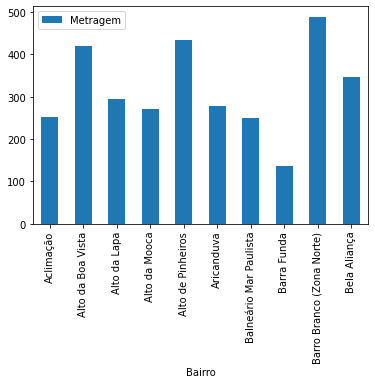

In [234]:

media_por_loja.head(10).plot.bar()


Visualização do primeiro valor da coluna "Valor". Sepraração dos elementos do primeiro valor

In [235]:
#Seria para apenas visualizar
dados["Valor"][0]

#Separação do valor
dados["Valor"][0].split()

['R$', '7.000.000']


Aplicando a separação (split) em toda a coluna "Vendas"


In [236]:
#É importante dizer que é string (str), pois já vimos que a coluna é um object
#Dá pra notar que algumas valores estão divididos em três partes: R$, número e /Mês. Podendo ter até mais.
#Precisamos ter apenas números

dados["Valor"].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

Tendo certeza de que tem apenas 3 elementos

In [237]:
#Foi criada uma tabela com os componentes da coluna "Valor"

dados["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Tendo certeza de que na primeira parte da coluna "Valor" tem apenas R$

In [238]:
#Nova tabela, com seus componentes expandidos, separados (expand=True)
#A função unique mostra quais são os representantes daquela posição na tabela
#Como só existe R$ na parte [0] dessa nova tabela que criamos a partir de "Valor", apenas esse array deve aparecer
#Se for aplicado para [1], aparecerão todos os números de valores
#Se for aplicado para [2], aparecerão os termos /Mês, /Ano e /Dia

dados["Valor"].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

Acrescentando novas colunas ao nosso dataframe

In [239]:
#Como dados vai receber colunas novas, temos que, além dos colchetes existentes, acrescentar novos
#Se a coluna "Valor_nuncio" fosse apenas "Valor", ela subescreveria os dados da coluna "Valor" atual
#Em resumo, o split da coluna "Valor", vai agora fazer parte do nosso dataframe
#Cada elemento do split, vai se tornar, respectivamente: Moeda, Valor_anucio e Tipo_anuncio

dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês


Filtrando a coluna "Tipos_anuncio" para apenas valores nulos, ou seja, remover as linhas com aluguel (/Mês, /Ano e /Dia)

In [240]:
#Primeiro foi criado o filto da coluna para apenas valores nulos-> dados["Tipo_anuncio"].isnull()
#Em seguida, filtramos de dados[] apenas o que queremos
#Pra ter certeza de que temos apenas espaços vazios no "Tipo_anuncio", usamos a função unique()

dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

Tranformando o filtro criado acima em nosso novo dataframe, com nome de dados_vendas (Para caso eu queira comparar com os dados antigos, ainda ter a variável disponível)

In [241]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

#Note que não temos mais o mesmo número de rows
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


A coluna "Vendas_anuncio" ainda é objeto (string)

In [242]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Conversão de "Valor_anuncio" em números, criando uma nova coluna: "Valor_anuncio_float"

In [243]:
#IMPORTANTE>>> Como os valores estão com pontos separando, o python entende que tem mais de um separador de casa decimal
#Antes de tranformar, precisamos remover os pontos
#O comando é simples, quero dar um replace, de . para nada -> .replace(".","")
#O replace também serviu para a mudança de tipo, de str para float

dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Média da coluna "Valores_anuncio_float"

In [252]:
media= dados_vendas["Valor_anuncio_float"].mean()

print(f"{media:.2f}")

3052202.96


Análise mais ampla dos dados

In [255]:
#Para facilitar a visualização, no passo 1, será removido do dataframe, os números excedentes após a vírgula
#Como são números muito grandes, alguns dados aparecem em notação científica
#A notação científica atrapalha a visualização, a removoção se dará na etapa 2

pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

#Somente númericos
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Para facilitar uma visão geral, podemos incluir strings no describe

In [261]:
#Comando para ver tudo junto-> dados_vendas.describe(include = "all")
#Comando para ver apenas as colunas com strings

dados_vendas[["Rua", "Bairro", "Cidade"]].describe(include = "all")

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


Gráficos com seaborn e matplotlib

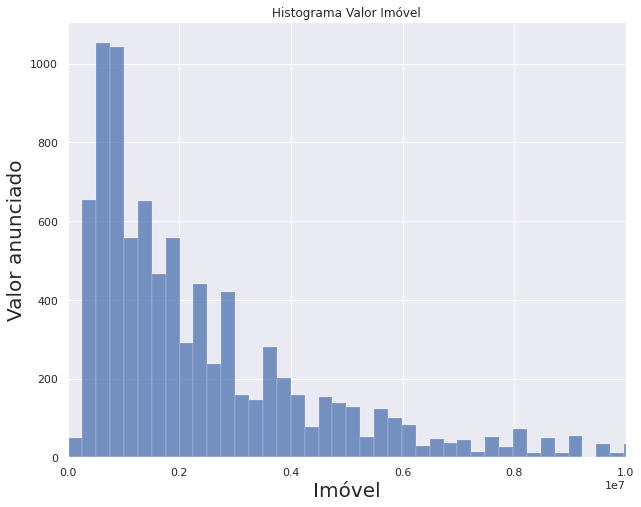

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.figure(figsize = (10, 8))

ax= sns.histplot(data = dados_vendas, x = "Valor_anuncio_float")

ax.set_title("Histograma Valor Imóvel")

ax.set_xlabel("Imóvel", fontsize = 20)

ax.set_ylabel("Valor anunciado", fontsize = 20)

plt.xlim(-50, 10000000)


plt.show()

In [285]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00
